In [1]:
import json
import pandas as pd

with open('keyword_with_abstract.json', 'r', encoding='utf-8') as f:
    data = json.load(f)
paper_df = pd.DataFrame(data)

In [2]:
paper_df[:5]
abstract_list = paper_df["Abstract"].tolist()

In [3]:
def remove(word_lst):
    remove_char = "(!.,'\"?:-/%ω)`~^$#@′√“‘”"
    for i in range(len(word_lst)):
        word = word_lst[i]
        for char in word:
            if char in remove_char:
                word = word.replace(char, '')
        word_lst[i] = word
    return word_lst

In [4]:
import re

INDEX_IGNORE = set(
    [
        # conj
        "a", "an", "the",

        # pronouns
        "i", "you", "he", "she", "it", "we", "they",
        "me", "him", "her", "us", "them", "my", "your", "his", "its", "our", "their",
        "mine", "yours", "hers", "ours", "theirs",
        "who", "whom", "whose", "which", "that", 

        # 疑问词
        "what", "where", "when", "why", "how",

        # 助动词
        "can", "could", "may", "might", "shall", "should", "will", "would",
        "do", "does", "did", "done",

        # 关系词和连接词
        "and", "or", "but", "if", "because", "since", "although", "though",
        "while", "whereas", "unless", "however", "moreover", "furthermore",
        "therefore", "thus", "such", "for", "also", "from"

        # 介词
        "in", "on", "at", "by", "with", "without", "over", "under", "between", 
        "among", "through", "before", "after", "about", "above", "below", "from",

        # 频率副词和程度副词
        "very", "too", "quite", "rather", "almost", "always", "never", "sometimes",
        "often", "rarely", "seldom",

        # Be动词及变形
        "be", "am", "is", "are", "was", "were", "been", "being",

        # Have动词及变形
        "have", "has", "had", "having",

        # Make/Do/Take 相关
        "make", "makes", "made", "making",
        "do", "does", "doing", "done",
        "take", "takes", "took", "taken", "taking",

        # 常见无意义动词
        "get", "gets", "got", "getting",
        "give", "gives", "gave", "given", "giving",
        "use", "uses", "used", "using",
        "put", "puts", "putting",
        "set", "sets", "setting",

        # 学术论文常见无意义词
        "research", "study", "paper", "article", "findings", "results", "conclusion",
        "approach", "method", "methods", "analysis", "data", "dataset", "datasets",
        "experiment", "experiments", "observations", "observation",
        "propose", "proposed", "evaluate", "evaluated",
        "including", "based", "using", "applied", "application",
        "system", "systems", "frameworks", "approach", "approaches",
        "science", "scientific", "technology", "technologies", "engineering",
        "field", "fields", "process", "processes",
        "used", "utilized", "utilize", "develop", "developed", "development", "into",
        "one", "two", "three", "four", "five", "six", "seven","eight",

        # 其他常见停用词
        "like", "such", "many", "much", "more", "most", "less", "least",
        "some", "any", "none", "all", "both", "each", "every", "either", "neither",
        "other", "another", "same", "different",
        "this", "these", "those", "their", "they", "them",

        # 其他可能的无意义字符
        "om", "log"
    ]
)


def ignore(word_lst):
    new_words = [
        word for word in word_lst
        if word not in INDEX_IGNORE and not re.fullmatch(r"\d+|[a-zA-Z]{1,2}", word)
    ]
    return new_words

import re

def process_word_list(word_list):
    word_set = set(word_list)  # 使用集合加速查找
    processed_list = []
    
    for word in word_list:
        if word.endswith("ss"):
            processed_list.append(word)  # 直接保留 "ss" 结尾的单词
        elif word.endswith("ies"):
            singular = word[:-3] + "y"  # 将 "ies" 替换为 "y"
            if singular in word_set:
                processed_list.append(singular)
            else:
                processed_list.append(word)
        elif word.endswith("es"):
            word_without_s = word[:-1]  # 去掉 's'
            word_without_es = word[:-2]  # 去掉 'es'
            
            if word_without_s in word_set:
                processed_list.append(word_without_s)
            elif word_without_es in word_set:
                processed_list.append(word_without_es)
            else:
                processed_list.append(word)
        elif word.endswith("s"):
            word_without_s = word[:-1]
            if word_without_s in word_set:
                processed_list.append(word_without_s)
            else:
                processed_list.append(word)
                    
        else:
            processed_list.append(word)  # 不是 "es"/"ies" 结尾的词直接保留
    
    return processed_list



In [5]:
full_text = ignore(remove(" ".join(abstract_list).lower().split()))

In [6]:
processed_list = process_word_list(full_text)

In [7]:
from collections import Counter
import nltk
from nltk.stem import PorterStemmer

word_list = processed_list
word_freq = Counter(word_list)

# stemmer = PorterStemmer()
merged_freq = Counter()
for word, freq in word_freq.items():
    #stemmed_word = stemmer.stem(word)  # 对词汇进行词干提取
    merged_freq[word] += freq

print(merged_freq)
# print(word_freq)

Counter({'model': 1980, 'learning': 1427, 'machine': 1139, 'algorithm': 600, 'performance': 571, 'prediction': 557, 'accuracy': 550, 'network': 549, 'feature': 491, 'technique': 389, 'neural': 312, 'time': 307, 'provide': 297, 'classification': 293, 'deep': 285, 'potential': 272, 'new': 268, 'detection': 262, 'information': 253, 'various': 242, 'challenge': 240, 'high': 238, 'compared': 230, 'artificial': 227, 'patient': 225, 'training': 225, 'design': 223, 'work': 223, 'applications': 221, 'not': 221, 'value': 220, 'predict': 216, 'parameter': 211, 'problem': 210, 'energy': 209, 'image': 206, 'regression': 204, 'error': 203, 'than': 199, 'show': 194, 'present': 191, 'structure': 183, 'type': 181, 'intelligence': 181, 'improve': 178, 'due': 177, 'condition': 176, 'factor': 174, 'experimental': 174, 'effect': 173, 'tool': 172, 'human': 171, '': 171, 'task': 171, 'future': 171, 'significant': 169, 'disease': 168, 'random': 165, 'optimization': 165, 'area': 161, 'support': 160, 'number': 

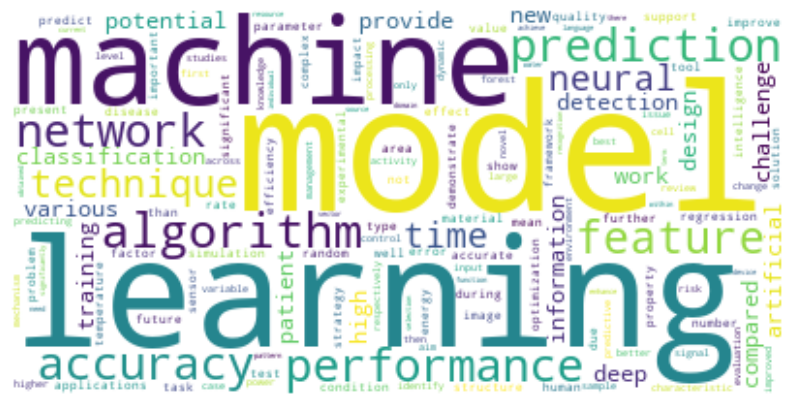

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color='white').generate_from_frequencies(merged_freq)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [94]:
import json
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
from fuzzywuzzy import process
from collections import Counter


city_df = pd.read_excel('cities_1.xlsx')

In [95]:
city_df[:5]

,name,state_name,country_name,latitude,longitude
0,Ashkāsham,Badakhshan,Afghanistan,36.68333,71.53333
1,Fayzabad,Badakhshan,Afghanistan,37.11664,70.58002
2,Jurm,Badakhshan,Afghanistan,36.86477,70.83421
3,Khandūd,Badakhshan,Afghanistan,36.95127,72.31800
4,Rāghistān,Badakhshan,Afghanistan,37.66079,70.67346


In [96]:
paper_df[:5]

,paper_title,paper_author,publication,citied_by,cover_date,Abstract,affiliation_name,affiliation_city,affiliation_country
0,Real-Time Intelligent Anomaly Detection and Pr...,Gürfidan R.,Sakarya University Journal of Computer and Inf...,0,2023-12-31,Real-time anomaly detection in network traffic...,Isparta University of Applied Sciences,Isparta,Turkey
1,Prediction of Cardiovascular Disease Based on ...,Akkur E.,Sakarya University Journal of Computer and Inf...,0,2023-12-31,"Globally, cardiovascular diseases (CVD) accoun...",Turkish Medicines and Medical Devices Agency,Cankaya,Turkey
2,Social Media User Opinion Analysis Using Deep ...,Şencan Ö.A.,Turkish Journal of Mathematics and Computer Sc...,0,2023-12-31,The rapid surge in social media usage has augm...,Gazi Üniversitesi,Ankara,Turkey
3,Skin Lesion Classification Using Convolutional...,Kestek E.,Turkish Journal of Mathematics and Computer Sc...,1,2023-12-31,"Skin cancer, which can occur in any part of th...",Bartin Üniversitesi,Bartin,Turkey
4,Artificial intelligence (AI) or augmented inte...,Moodley K.,South African medical journal = Suid-Afrikaans...,2,2023-12-31,The sanctity of the doctor-patient relationshi...,"Stellenbosch University, Faculty of Medicine a...",Cape Town,South Africa


In [19]:
pip install fuzzywuzzy

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd

merged_df = pd.merge(paper_df, city_df[['name', 'country_name', 'state_name','latitude', 'longitude']], 
                     left_on=['affiliation_city', 'affiliation_country'], 
                     right_on=['name', 'country_name'], 
                     how='left')
merged_df[:10]

,paper_title,paper_author,publication,citied_by,cover_date,Abstract,affiliation_name,affiliation_city,affiliation_country,matched_city,matched_country,name,country_name,state_name,latitude,longitude
0,Real-Time Intelligent Anomaly Detection and Pr...,Gürfidan R.,Sakarya University Journal of Computer and Inf...,0,2023-12-31,Real-time anomaly detection in network traffic...,Isparta University of Applied Sciences,Isparta,Turkey,None,None,Isparta,Turkey,Isparta,37.76444,30.55222
1,Prediction of Cardiovascular Disease Based on ...,Akkur E.,Sakarya University Journal of Computer and Inf...,0,2023-12-31,"Globally, cardiovascular diseases (CVD) accoun...",Turkish Medicines and Medical Devices Agency,Cankaya,Turkey,None,None,NaN,NaN,NaN,NaN,NaN
2,Social Media User Opinion Analysis Using Deep ...,Şencan Ö.A.,Turkish Journal of Mathematics and Computer Sc...,0,2023-12-31,The rapid surge in social media usage has augm...,Gazi Üniversitesi,Ankara,Turkey,None,None,Ankara,Turkey,Ankara,39.91987,32.85427
3,Skin Lesion Classification Using Convolutional...,Kestek E.,Turkish Journal of Mathematics and Computer Sc...,1,2023-12-31,"Skin cancer, which can occur in any part of th...",Bartin Üniversitesi,Bartin,Turkey,None,None,NaN,NaN,NaN,NaN,NaN
4,Artificial intelligence (AI) or augmented inte...,Moodley K.,South African medical journal = Suid-Afrikaans...,2,2023-12-31,The sanctity of the doctor-patient relationshi...,"Stellenbosch University, Faculty of Medicine a...",Cape Town,South Africa,None,None,Cape Town,South Africa,Western Cape,-33.92584,18.42322
5,PREDICTION OF TEMPERATURE FIELD DISTRIBUTION I...,Pařez J.,Acta Polytechnica,0,2023-12-31,This paper presents the prediction of temperat...,Czech Technical University in Prague,Prague,Czech Republic,None,None,Prague,Czech Republic,"Praha, Hlavní město",50.08804,14.42076
6,Hyperspectral prediction of pigment content in...,Zhao J.,Journal of Agricultural Engineering,3,2023-12-31,Leaf pigment content can reflect the nutrient ...,Shanxi Agricultural University,Taiyuan,China,None,None,Taiyuan,China,Shanxi,37.86944,112.56028
7,Departure Flight Delay Prediction and Visual A...,Qi X.,SAE Technical Papers,0,2023-12-31,"Nowadays, the rapid growth of civil aviation t...",Southeast University,Nanjing,China,None,None,Nanjing,China,Taiwan,32.06167,118.77778
8,Machine Learning Based Flight State Prediction...,Mu J.,SAE Technical Papers,0,2023-12-31,Unmanned Aerial Vehicles (UAVs) encounter vari...,Hangzhou City University,Hangzhou,China,None,None,Hangzhou,China,Zhejiang,30.29365,120.16142
9,Aeroengine Gas Path Parameter Trend Prediction...,Liu Y.,SAE Technical Papers,0,2023-12-31,Accurately predicting the trend of aero-engine...,Tsinghua University,Beijing,China,None,None,Beijing,China,Beijing,39.90750,116.39723


In [26]:
merged_df[:5]

,paper_title,paper_author,publication,citied_by,cover_date,Abstract,affiliation_name,affiliation_city,affiliation_country,matched_city,matched_country,name,country_name,state_name,latitude,longitude
0,Real-Time Intelligent Anomaly Detection and Pr...,Gürfidan R.,Sakarya University Journal of Computer and Inf...,0,2023-12-31,Real-time anomaly detection in network traffic...,Isparta University of Applied Sciences,Isparta,Turkey,None,None,Isparta,Turkey,Isparta,37.76444,30.55222
1,Prediction of Cardiovascular Disease Based on ...,Akkur E.,Sakarya University Journal of Computer and Inf...,0,2023-12-31,"Globally, cardiovascular diseases (CVD) accoun...",Turkish Medicines and Medical Devices Agency,Cankaya,Turkey,None,None,NaN,NaN,NaN,NaN,NaN
2,Social Media User Opinion Analysis Using Deep ...,Şencan Ö.A.,Turkish Journal of Mathematics and Computer Sc...,0,2023-12-31,The rapid surge in social media usage has augm...,Gazi Üniversitesi,Ankara,Turkey,None,None,Ankara,Turkey,Ankara,39.91987,32.85427
3,Skin Lesion Classification Using Convolutional...,Kestek E.,Turkish Journal of Mathematics and Computer Sc...,1,2023-12-31,"Skin cancer, which can occur in any part of th...",Bartin Üniversitesi,Bartin,Turkey,None,None,NaN,NaN,NaN,NaN,NaN
4,Artificial intelligence (AI) or augmented inte...,Moodley K.,South African medical journal = Suid-Afrikaans...,2,2023-12-31,The sanctity of the doctor-patient relationshi...,"Stellenbosch University, Faculty of Medicine a...",Cape Town,South Africa,None,None,Cape Town,South Africa,Western Cape,-33.92584,18.42322


In [28]:
selected_columns = ["name", "state_name", "country_name", "latitude", "longitude"]
df_selected = merged_df[selected_columns]  # 只保留所需列

df_selected = df_selected.dropna(subset=["state_name"])  # 去掉 state_name 为空的行
df_selected.to_excel("output_geo.xlsx", index=False)  # 导出为 Excel，去掉默认索引

/var/folders/wt/ddh2q7z572nb9fptjwbl21vm0000gn/T/ipykernel_3929/214484223.py:6: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.1' currently installed).
  df_selected.to_excel("output_geo.xlsx", index=False)  # 导出为 Excel，去掉默认索引
